In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('malignant_train.csv')  #Path location of the dataset
df_train.head()  #Checking out the top 5 rows of the dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_test=pd.read_csv('malignant_test.csv')  #Path location of the dataset
df_test.head()  #Checking out the top 5 rows of the dataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


UNDERSTANDING DATA

In [4]:
df_train.shape

(159571, 8)

In [5]:
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [6]:
df_train['highly_malignant'].value_counts()


0    157976
1      1595
Name: highly_malignant, dtype: int64

In [7]:
df_train['rude'].value_counts()


0    151122
1      8449
Name: rude, dtype: int64

In [8]:
df_train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [9]:
df_train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [10]:

df_train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

DATA DESCRIPTION

In [11]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [12]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [13]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [14]:
df_test.dtypes

id              object
comment_text    object
dtype: object

EXPLORATORY DATA ANALYSIS

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

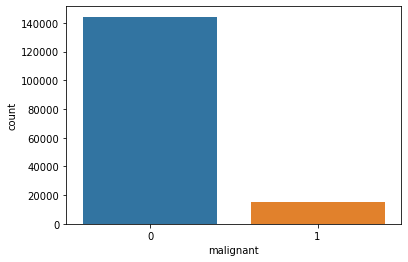

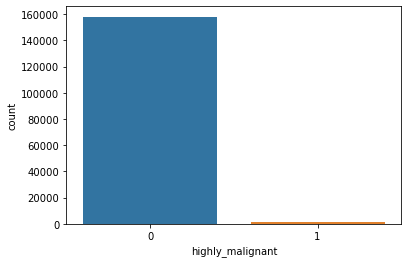

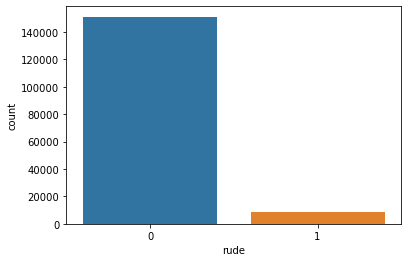

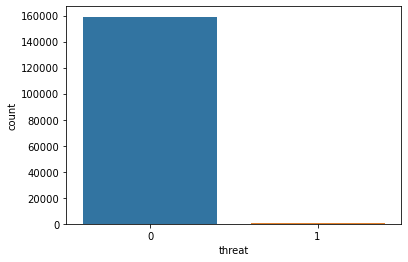

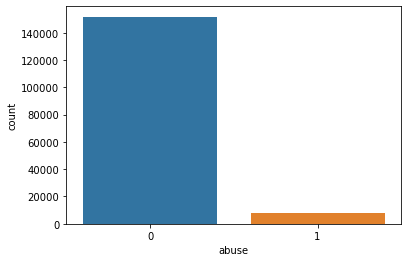

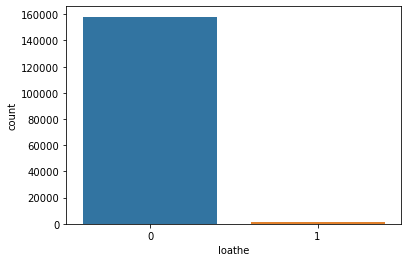

In [16]:
categories=df_train.columns[2:]
for col in categories:
    sns.countplot(df_train[col])
    plt.show()

While maximum Categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum



In [17]:
#Checking the percentage of the comments
none = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(none)/len(df_train)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can see that there are more good/neutral comments rather than negative comments

In [18]:
#Storing the number of counts for every target label
counts=df_train.iloc[:,2:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

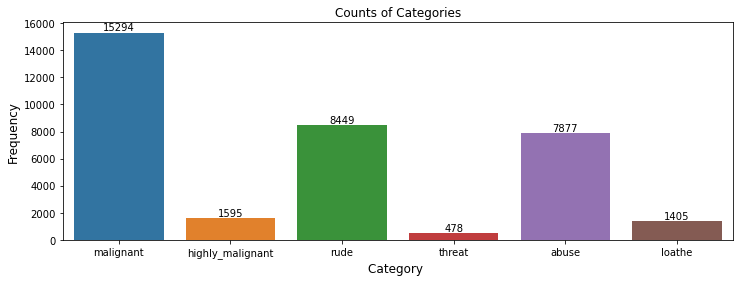

In [19]:
#Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Malignant comments are the highest among all whereas threat comments are very less. Rude and abuse comments are also present more



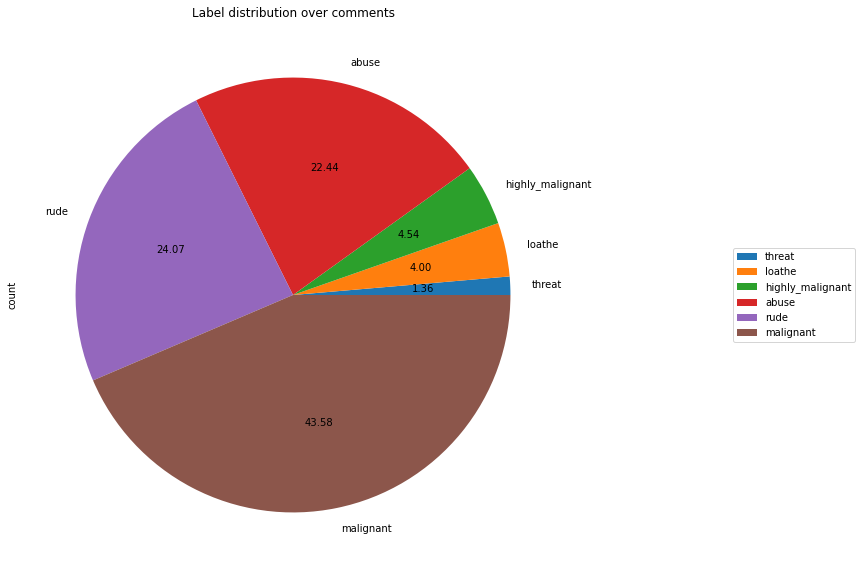

In [20]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

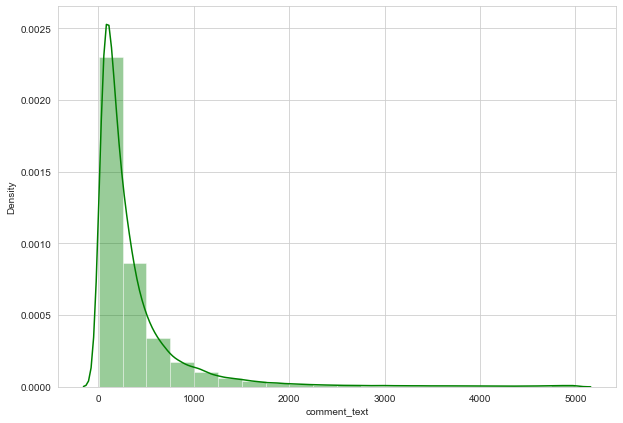

In [21]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'green')

Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5. Median length being 250.

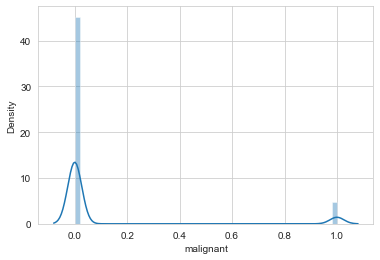

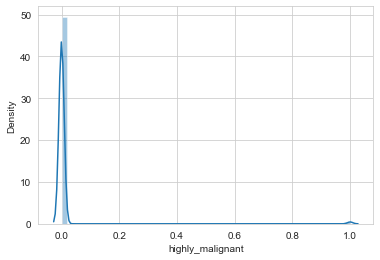

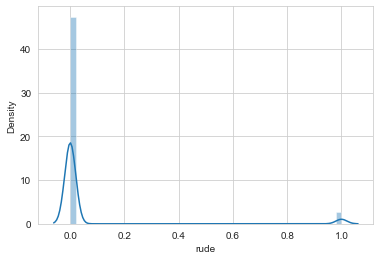

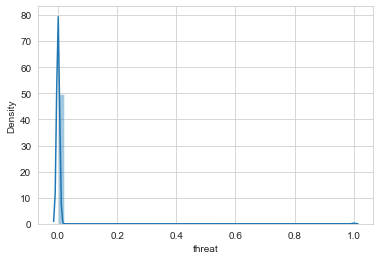

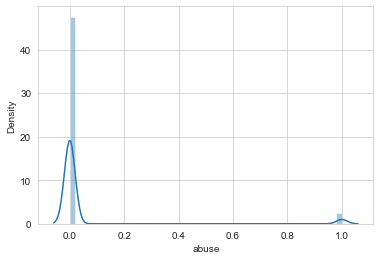

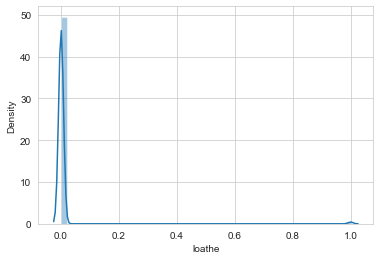

In [22]:
#Plotting distplot for checking the distribution of data
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()

We can see that most data are normally distributed

In [23]:
df_train.describe()    #Statistical summary of the dataset

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The minimum value and the maximum value of the attributes is same i.e., 0 and 1 respectively.
The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.
Here, with this statistical analysis, it is interpreted that there are no outliers as well as skewness present in this training dataset.
The count of each field is equal which shows that there are no missing values present.

In [24]:
#Checking correlation of the dataset
corr=df_train.corr()  #corr() function provides the correlation value of each column
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


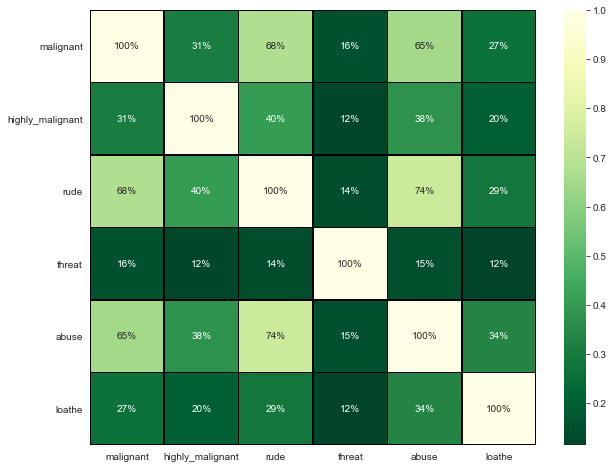

In [25]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='YlGn_r',annot=True)
plt.show()

The highest positive correlation is seen in between fields 'rude' and 'abuse'.
Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.
Overall the correlation among the attributes is not positive.

In [26]:
#As ID is not much important, we can drop from the dataset
df_train.drop('id',axis=1,inplace=True)

Data pre-processing

In [27]:
#Creating a 'label' column in the train dataset
#Label column is the sum of all the target features
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_train[comments_labels].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [28]:
df_train['label']=df_train[comments_labels].sum(axis=1)
df_train.head(10)  #Checking the dataset after adding it

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


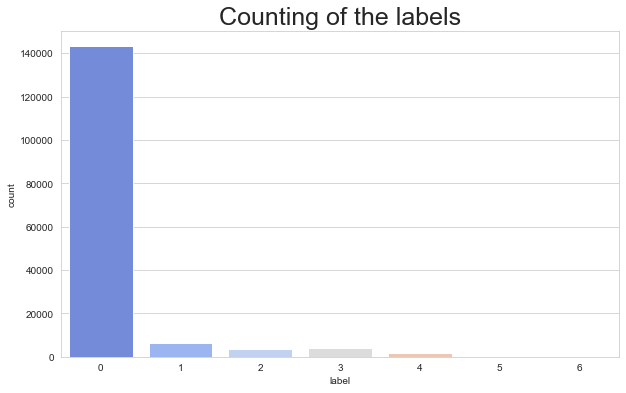

In [29]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(df_train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [30]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [31]:
df_train['label'].value_counts()


0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [32]:
#Scaling the label column
df_train['label'] = df_train['label'] >0
df_train['label'] = df_train['label'].astype(int)
df_train.head(15)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


0    143346
1     16225
Name: label, dtype: int64


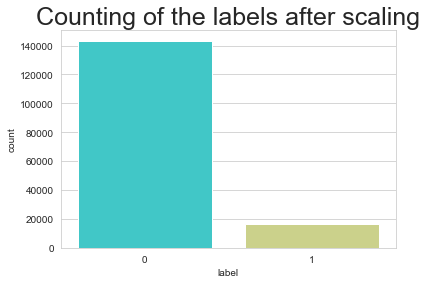

In [33]:
#Checking the counting of labels after scaling
print(df_train['label'].value_counts())
sns.countplot(df_train['label'], palette='rainbow')
plt.title('Counting of the labels after scaling',fontsize=25)
plt.show()

After scaling the data, we can see that 0 has more weightage and 1 has lesser weightage


In [34]:
#Creating a column 'length_before_cleaning' in training dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [35]:
#Creating a column 'length_before_cleaning' in test dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_test['length_before_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


Preprocessing using NLP

In [36]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [38]:
#Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

In [39]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [40]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [41]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


We can see that nearly half of the text has been removed from the comment_text after using required pre-processing

In [42]:

#Checking Total length removal in train dataset
print("Original Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Original Length: 62893101
Cleaned Length: 38474813
Total Words Removed: 24418288


In [43]:
#Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [44]:
#Creating a column 'len_after_cleaning'
#It represents the length of the each comment respectively in a column 'comment_text' after cleaning the text
df_test['len_after_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning,len_after_cleaning
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,235
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [45]:
#Total length removal in test dataset
print('Original Length:',df_test.length_before_cleaning.sum())
print('Clean Length:',df_test.len_after_cleaning.sum())
print("Total Words Removed:", (df_test.length_before_cleaning.sum()) - (df_test.len_after_cleaning.sum()))

Original Length: 55867176
Clean Length: 34270791
Total Words Removed: 21596385


Plotting wordcloud for each feature

In [46]:
df_malignant=df_train[(df_train['malignant']==1)]
df_malignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
12,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0,1,319,197
16,bye look come think comming back tosser,1,0,0,0,0,0,1,57,39
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


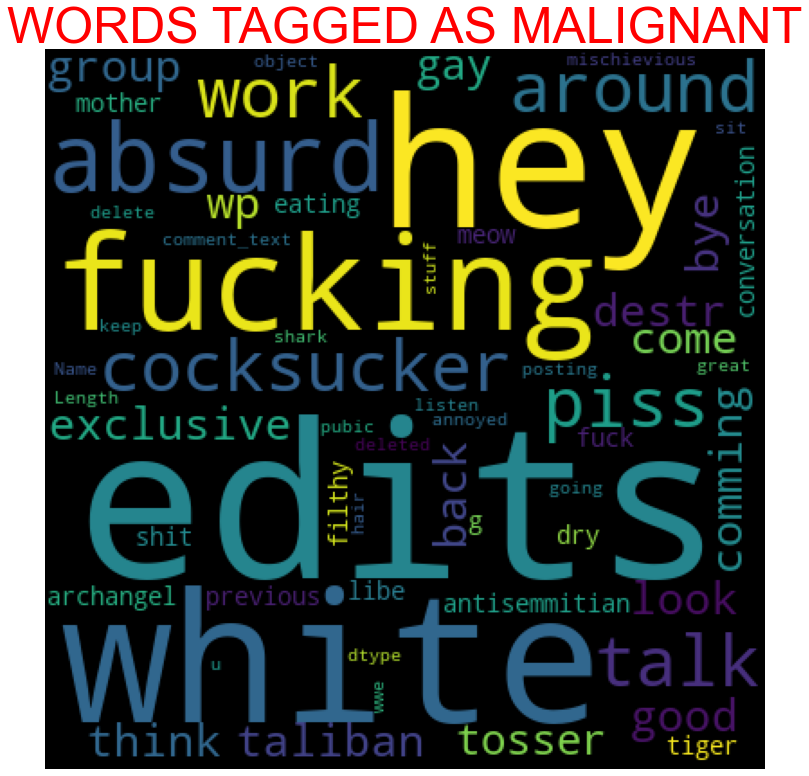

In [47]:
#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [48]:
df_highlymalignant=df_train[(df_train['highly_malignant']==1)]
df_highlymalignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
181,stupid fuck mother cunt stink,1,1,1,0,1,0,1,53,29
442,hi im fucking bitch,1,1,1,0,1,0,1,40,19
579,motherfucking piece crap fuckhead blocking u,1,1,1,0,1,0,1,67,44
...,...,...,...,...,...,...,...,...,...,...
159096,filthy stinking crow back dirty crow better de...,1,1,1,0,1,0,1,251,168
159099,fucking pathetic moron cc jimbo wale rootmyass,1,1,1,0,1,0,1,62,46
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159312,walter mercado antonio quite frankly fucker co...,1,1,1,0,1,0,1,192,137


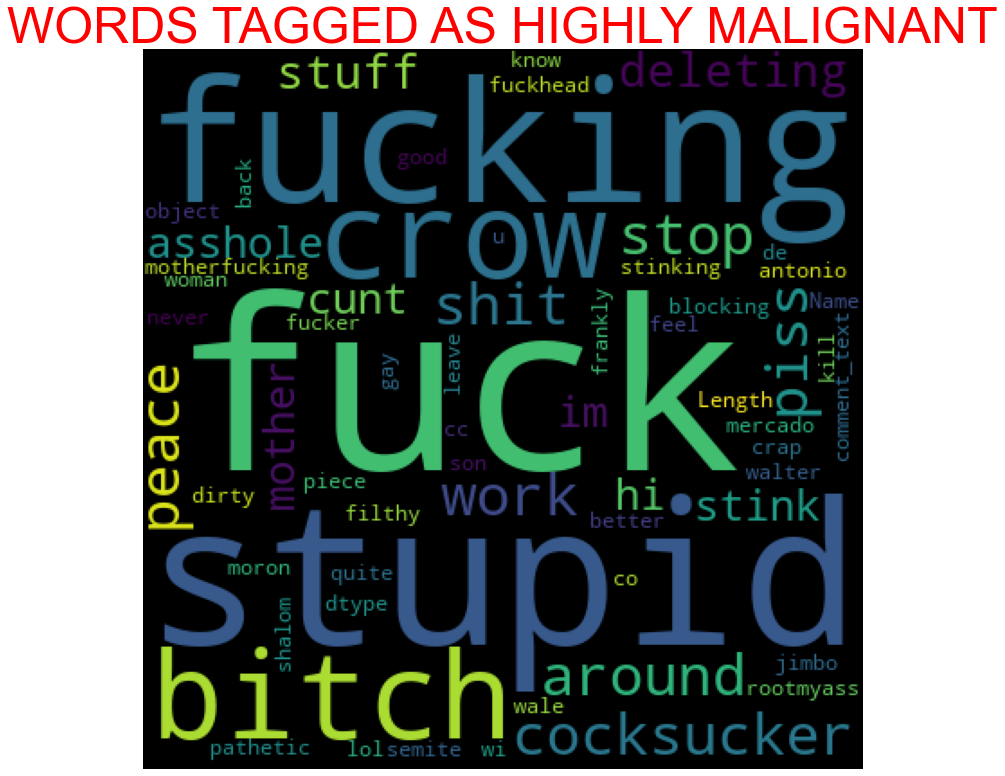

In [49]:
#Plotting for highly_malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [50]:
df_rude=df_train[(df_train['rude']==1)]
df_rude

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
51,get fucked get fuckeeed got drink cant put get...,1,0,1,0,0,0,1,124,75
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
...,...,...,...,...,...,...,...,...,...,...
159411,fat piece shit obese piece shit thought naked ...,1,0,1,0,1,0,1,91,65
159493,fucking faggot lolwat,1,0,1,0,1,0,1,24,21
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213


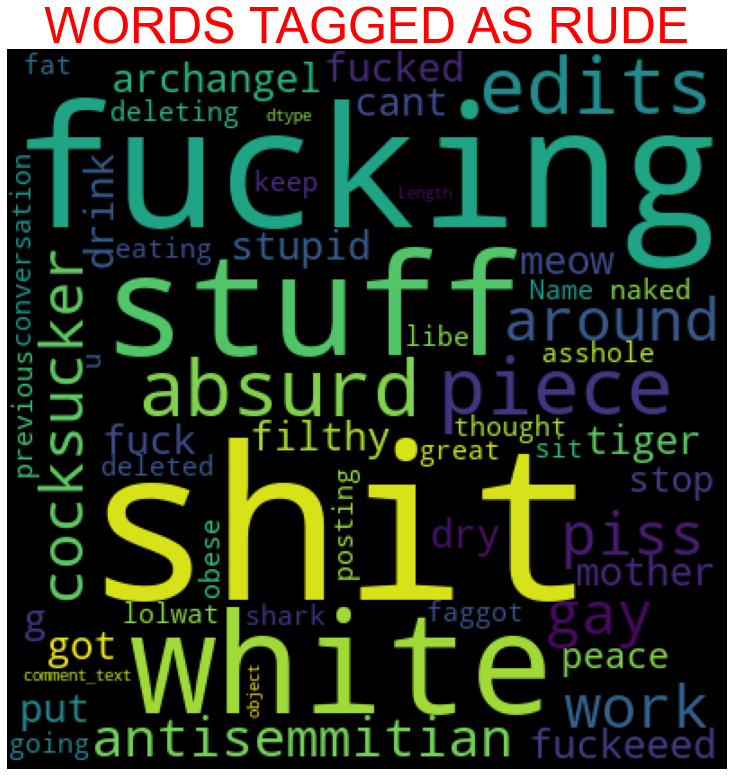

In [51]:
#Plotting for rude
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [52]:
df_threat=df_train[(df_train['threat']==1)]
df_threat

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
79,hi back last warning stop undoing edits die,1,0,0,1,0,0,1,64,43
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
600,also sock puppet account suprise sincerely man...,1,0,0,1,0,0,1,138,66
802,fuck smith please notified die want dance grave,1,0,1,1,1,0,1,85,47
1017,first time bitch fuck find live sodomize wife ...,1,1,1,1,1,1,1,150,75
...,...,...,...,...,...,...,...,...,...,...
157718,bitch fucking hore suck dick big as hole gay f...,1,0,1,1,1,1,1,316,195
158717,stupid head dumb stupid die die die go suck butt,1,0,1,1,1,0,1,69,48
158856,hey hey faggot dead yet watching mom getting r...,1,1,1,1,1,0,1,212,124
159029,death musulmans,1,0,0,1,0,1,1,19,15


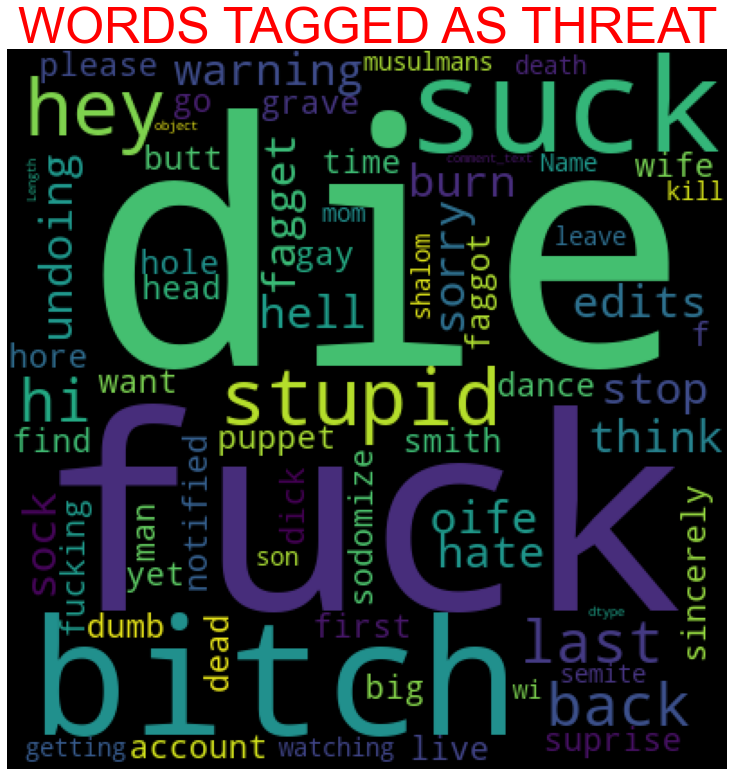

In [53]:
#Plotting for threat
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [54]:
df_abuse=df_train[(df_train['abuse']==1)]
df_abuse

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
56,tony sidaway obviously fistfuckee love arm as,1,0,1,0,1,0,1,68,45
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


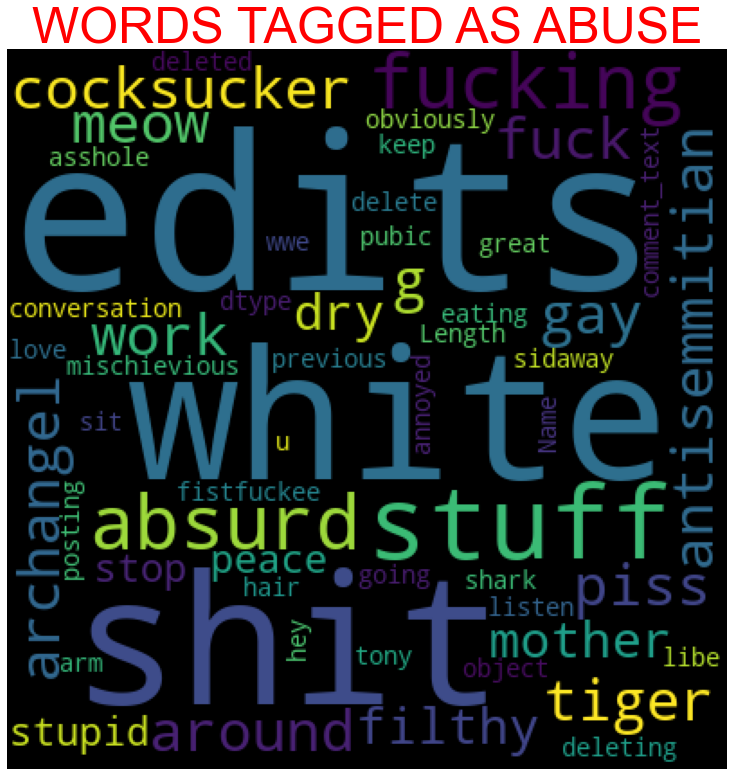

In [55]:
#Plotting for abuse
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [56]:
df_loathe=df_train[(df_train['loathe']==1)]
df_loathe

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
105,pair jew hating weiner nazi schmuck,1,0,1,0,1,1,1,42,35
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
218,kill nigger hard others said included racist s...,1,0,1,0,1,1,1,120,58
238,u r tw fuck u gay boy u r smelly fuck ur mum p...,1,0,1,0,1,1,1,58,51
...,...,...,...,...,...,...,...,...,...,...
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159336,oh fuck pansy jew would whine b nai brith beat...,1,0,1,0,1,1,1,110,64
159400,shalom semite get fuck kill son bitch leave wi...,1,1,1,1,1,1,1,474,265
159449,think gay fag,1,0,0,0,0,1,1,26,13


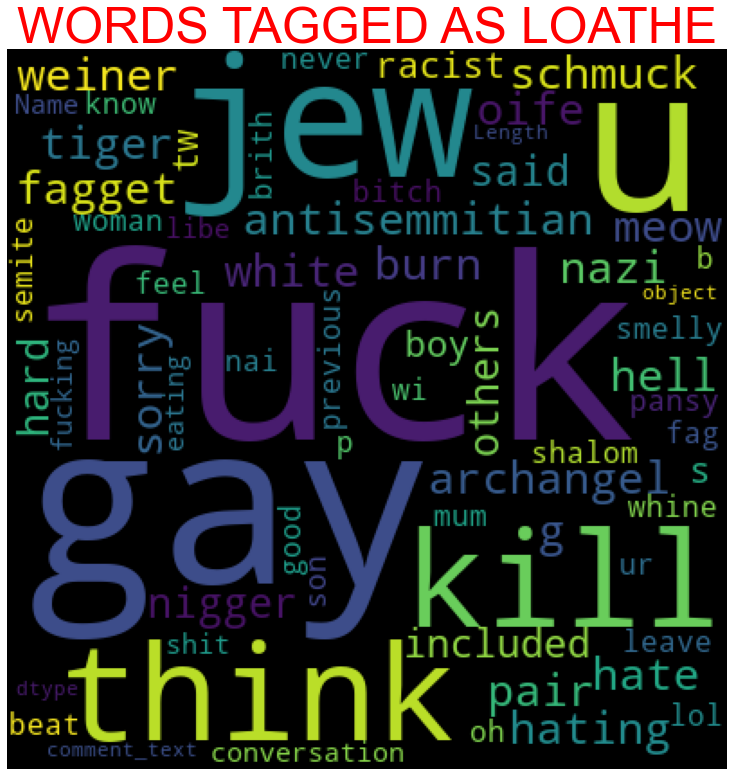

In [57]:
#Plotting for loathe
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

Separating independent and dependent variables

In [58]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [59]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])

In [60]:
y=df_train['label']

In [61]:
print(X.shape,'\t\t', y.shape)    #Checking the shape of the data

(159571, 15000) 		 (159571,)


In [62]:
#Doing the above process for test data 
test_vec = tf_vec.fit_transform(df_test['comment_text'])
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2869499 stored elements in Compressed Sparse Row format>

In [63]:
test_vec.shape

(153164, 15000)

Building the model

In [64]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [65]:
#Checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 15000) 		 (47872, 15000)


In [66]:
#Checking the shape of y data
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)


Handling the imbalanced data using oversampling technique

In [67]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [69]:
#Importing the Oversampling library and Counter
from collections import Counter

from imblearn.over_sampling import RandomOverSampler

In [70]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [71]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [72]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.954879679144385


cross_val_score:  0.9560822426470418


roc_auc_score:  0.8030091141318226


Hamming_loss: 0.04512032085561497


Log_loss : 1.5584052327687492


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.92      0.61      0.73      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[42731   273]
 [ 1887  2981]]


AUC_ROC curve:



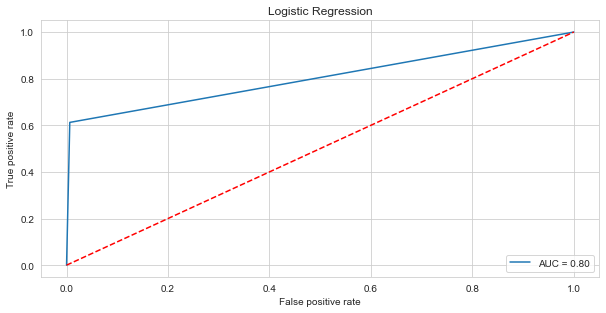





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9463569518716578


cross_val_score:  0.9466005743090046


roc_auc_score:  0.7517210567712377


Hamming_loss: 0.053643048128342245


Log_loss : 1.8527680839257563


Classification report:
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43004
           1       0.94      0.51      0.66      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.75      0.81     47872
weighted avg       0.95      0.95      0.94     47872



Confusion matrix: 

[[42834   170]
 [ 2398  2470]]


AUC_ROC curve:



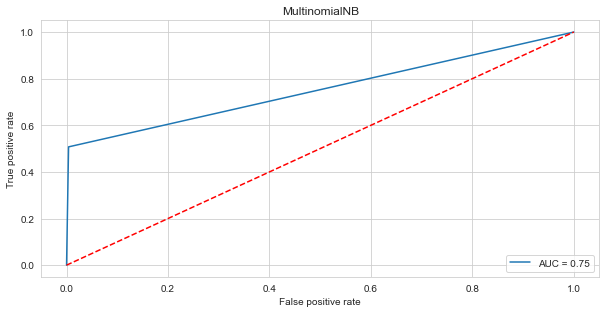





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9404871323529411


cross_val_score:  0.9411672496656008


roc_auc_score:  0.8284263385103311


Hamming_loss: 0.05951286764705882


Log_loss : 2.055523826330324


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43004
           1       0.72      0.69      0.70      4868

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



Confusion matrix: 

[[41675  1329]
 [ 1520  3348]]


AUC_ROC curve:



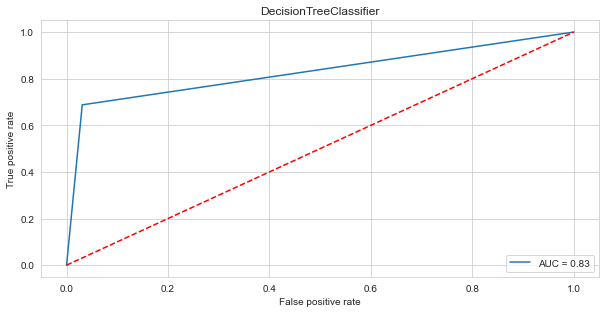





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.9172376336898396


cross_val_score:  0.9180364853526777


roc_auc_score:  0.6223859896620039


Hamming_loss: 0.08276236631016043


Log_loss : 2.8585162422085704


Classification report:
 
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     43004
           1       0.79      0.25      0.38      4868

    accuracy                           0.92     47872
   macro avg       0.86      0.62      0.67     47872
weighted avg       0.91      0.92      0.90     47872



Confusion matrix: 

[[42682   322]
 [ 3640  1228]]


AUC_ROC curve:



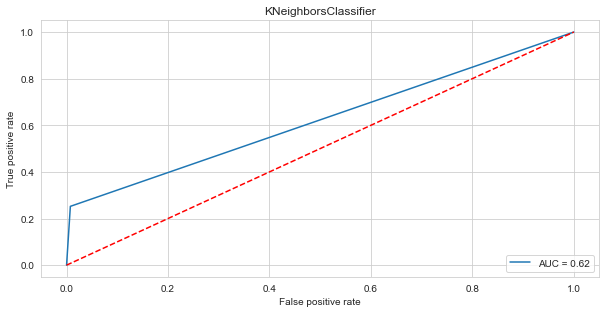





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9558405748663101


cross_val_score:  0.9570786587653991


roc_auc_score:  0.8289565962677834


Hamming_loss: 0.04415942513368984


Log_loss : 1.5252209620475623


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.87      0.67      0.76      4868

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



Confusion matrix: 

[[42498   506]
 [ 1608  3260]]


AUC_ROC curve:



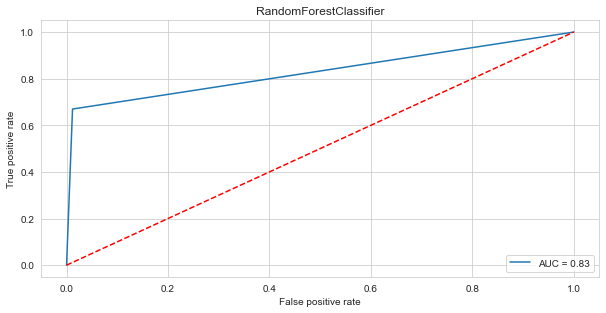





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.944894719251337


cross_val_score:  0.9459174938176664


roc_auc_score:  0.7650253168629972


Hamming_loss: 0.0551052807486631


Log_loss : 1.9032755675710091


Classification report:
 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     43004
           1       0.87      0.54      0.67      4868

    accuracy                           0.94     47872
   macro avg       0.91      0.77      0.82     47872
weighted avg       0.94      0.94      0.94     47872



Confusion matrix: 

[[42609   395]
 [ 2243  2625]]


AUC_ROC curve:



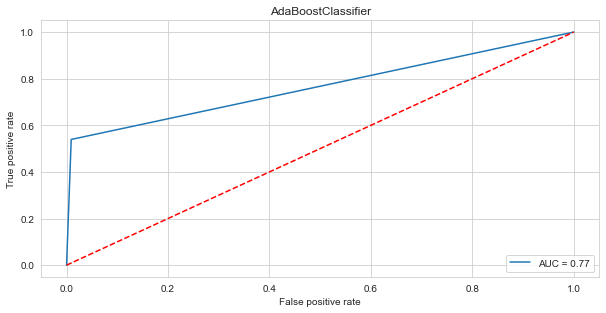





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9394635695187166


cross_val_score:  0.9403087028961223


roc_auc_score:  0.7150026058610511


Hamming_loss: 0.060536430481283425


Log_loss : 2.0908565578311746


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43004
           1       0.94      0.43      0.59      4868

    accuracy                           0.94     47872
   macro avg       0.94      0.72      0.78     47872
weighted avg       0.94      0.94      0.93     47872



Confusion matrix: 

[[42865   139]
 [ 2759  2109]]


AUC_ROC curve:



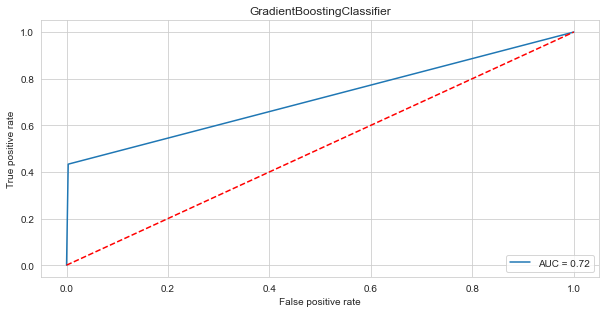

In [73]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
h_loss=[]
l_loss=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    hloss = hamming_loss(y_test, pre)
    print("Hamming_loss:", hloss)
    h_loss.append(hloss)
    print('\n')
    try : 
        loss = log_loss(y_test, pre)
    except :
            loss = log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [74]:


#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore,

                     
                     'Hamming_loss':h_loss, 'Log_loss':l_loss})
result




,Model,Accuracy_score,Cross_val_score,roc_auc_score,Hamming_loss,Log_loss
0,Logistic Regression,95.487968,95.608224,80.300911,0.045120,1.558405
1,MultinomialNB,94.635695,94.660057,75.172106,0.053643,1.852768
2,DecisionTreeClassifier,94.048713,94.116725,82.842634,0.059513,2.055524
3,KNeighborsClassifier,91.723763,91.803649,62.238599,0.082762,2.858516
4,RandomForestClassifier,95.584057,95.707866,82.895660,0.044159,1.525221
5,AdaBoostClassifier,94.489472,94.591749,76.502532,0.055105,1.903276
6,GradientBoostingClassifier,93.946357,94.030870,71.500261,0.060536,2.090857




After running the for loop of classification algorithms and the required metrics, we can see that the best performing algorithms are RandomForestClassifier  because the loss values are less and their scores are the best among all. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values

Hyperparameter Tuning

Random Forest Classifier

In [75]:
#Creating parameter list to pass in GridSearchCV
parameters={'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'n_estimators': [50, 100, 500]}

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)      #Mean cross-validated score of best_estimator

if we run GridSearchCV and RandomSearchCV, it takes more than 2 hours to run the code as the dataset is huge and the best params are not obtained from it due to more computational power requirement. The AUC Score, f1-score and recall value is high when we use randomforest with over sampling data. So we choose RandomForestClassifier model with over sampled data as our best model among all models.

In [ ]:
'rfc = RandomForestClassifier()
refc.fit(x_train,y_train)


In [ ]:
pred=rfc.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(rfc,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
hloss = hamming_loss(y_test, pre)
print("Hamming_loss:", hloss)
loss = log_loss(y_test, pre)
print("Log loss:", loss)

print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

In [ ]:
#AUC_ROC Curve of Randomforest Classifier with oversampled data
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

Finalizing the model

In [ ]:
rfc_prediction=rfc.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':rfc_prediction})
malignant_prediction

In [ ]:
#Saving the model
import pickle
filename='MalignantCommentsClassifier_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))

Predicting using test data

In [ ]:
#Checking our vectorized test data
test_vec

In [ ]:
#Loading the model
fitted_model=pickle.load(open('MalignantCommentsClassifier_Project.pkl','rb'))
fitted_model

In [ ]:
#Predictions
test_prediction=rfc.predict(test_vec)
test_df=pd.DataFrame({'Predictions':test_prediction})
test_df

In [ ]:

\